In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy
import numpy as np
import math

In [2]:
from astropy.timeseries import LombScargle
from gatspy.periodic import LombScargleFast
from gatspy.periodic import LombScargle
from matplotlib.backends.backend_pdf import PdfFile, PdfPages
from dtaidistance import dtw

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


### create pdffile


In [3]:
def create_pdf(c,export_name="test"):
    global pdfFile
    if c <10:
        pdfFile = PdfPages(f"data/power_spectrum/00{c}({export_name}).pdf")
    else: 
        pdfFile = PdfPages(f"data/power_spectrum/0{c}({export_name}).pdf")

In [4]:
from statistics import mean
from turtle import filling
num=list()
def read(path):
    global df
    df = pd.read_csv(path)
    global wu_pulmer_score
    wu_pulmer_score = list(df["Wu-Pulmer"])
    global SBERT
    SBERT = list(df["SBERT"])
    global Wu_Pulmer_Divided 
    Wu_Pulmer_Divided = list(df["Wu-Pulmer_divided"])
    global pair_counts
    pair_counts = list(df["pair_counts"])
    
   
    

In [5]:
l = np.array([1,2])
print(l[-1])

2


抓極值

In [6]:
import numpy as np
from astropy.timeseries import LombScargle
import matplotlib.transforms as transforms
from matplotlib.offsetbox import AnchoredText
from scipy.signal import argrelextrema

In [7]:
a = np.array([2,3,1,4,3,5,2])
a = np.append(a,[2,3])
print(a[-2])

2


In [8]:
a = np.array([a for a in range(10)])
print(a[numpy.where(a == 5)])
print()

[5]



設定想要找幾個極值

In [9]:
#num_of_extremum = 1 #設定想要找幾個極值

畫圖加上匯出指定數量的波峰的函式

In [10]:
from ctypes.wintypes import SIZE
from turtle import position


def calculate_PSD(a,y,starttime=0, endtime=480): #a是subject, y是計算幾個波峰
    global q
    q=0
    global num0303
    num0303=[]
    while q <len(Wu_Pulmer_Divided[starttime:endtime]):
        num0303 += [q]
        q+=1
    
    q=0
    global num
    num=[]
    while q <len(SBERT[starttime:endtime]):
        num += [q]
        q+=1

    
    num_of_extremum = y
    frequency, power = LombScargle(num,wu_pulmer_score[starttime:endtime]).autopower(minimum_frequency=0,maximum_frequency=0.5)


    fig = plt.figure(figsize = (20,6))
    #fig, ax=plt.subplots(figsize = (20,6))
    plt.title(f"subject:{a}     raw_wu_pulmer_score_PSD ")
    plt.grid()
    plt.xlabel("frequency")
    plt.plot(frequency, power)   
    power_new = np.sort(power)
    extremum = np.sort(power[argrelextrema(power,np.greater)])
    pmaxf = np.array([])
    for i in range(1, (num_of_extremum+1)):
        pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
        #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
        plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
    #trans = transforms.blended_transform_factory( ax.get_yticklabels()[0].get_transform(), ax.transData)
    #plt.text(0,23, "{:.0f}".format(max(power)), color="red", transform=trans, ha="right", va="center")
    #plt.scatter(argrelextrema(power,np.greater), power[argrelextrema(power,np.greater)],c='red') #找極值用的
    plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    pdfFile.savefig(fig)
    according_power1 = np.array([])
    for z in range(0,num_of_extremum):
        according_power1 = np.append(according_power1,power[numpy.where(frequency == pmaxf[z])])
    pmaxf1 = list(pmaxf)
    according_power1 = list(according_power1)
    

    

    
    frequency, power = LombScargle(num,SBERT[starttime:endtime]).autopower(minimum_frequency=0,maximum_frequency=0.5)
    global SBERTf
    global SBERTp
    SBERTf = frequency
    SBERTp = power
  
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{a}     SBERT_PSD ")
    plt.grid()
    plt.show
    plt.xlabel("frequency")
    plt.plot(frequency, power)    
    power_new = np.sort(power)
    extremum = np.sort(power[argrelextrema(power,np.greater)])
    pmaxf = np.array([])
    for i in range(1, (num_of_extremum+1)):
        pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
        #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
        plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
    plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    pdfFile.savefig(fig)
    according_power2 = np.array([])
    for z in range(0,num_of_extremum):
        according_power2 = np.append(according_power2,power[numpy.where(frequency == pmaxf[z])])
    pmaxf2 = list(pmaxf)
    according_power2 = list(according_power2)
    
    
    frequency, power = LombScargle(num0303,Wu_Pulmer_Divided[starttime:endtime]).autopower(minimum_frequency=0,maximum_frequency=0.5)
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{a}     wu_palmer_divided_PSD ")
    plt.grid()
    plt.show
    plt.xlabel("frequency")
    plt.plot(frequency, power)    
    power_new = np.sort(power)
    try:
        extremum = np.sort(power[argrelextrema(power,np.greater)])
    except:
        print("no extremum")
    pmaxf = np.array([])
    try:
        for i in range(1, (num_of_extremum+1)):
            pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
            #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
            plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
            plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    except:
        print("no extremum")
    
    pdfFile.savefig(fig)
    according_power3 = np.array([])
    try:
        for z in range(0,num_of_extremum):
            according_power3 = np.append(according_power3,power[numpy.where(frequency == pmaxf[z])])
    except:
        print()
    pmaxf3 = list(pmaxf)
    according_power3 = list(according_power3)
    period_Wu= []
    try:
        for i in range(0,num_of_extremum):
            period_Wu.append(1/pmaxf3[i])
    except:
        print()
    global freq
    freq = pmaxf3[0]
    
    global period_time
    period_time = period_Wu
    results_csv = pd.DataFrame(zip(pmaxf1,according_power1,pmaxf2,according_power2,pmaxf3,according_power3,period_Wu), columns = ["frequency(wu)","power(wu)","frequency(SBERT)","power(SBERT)","frequency(wu2)","power(wu2)","period(Wu)"])
    #power從大到小
'''
    if a <10:
        results_csv.to_csv(f'data/peaks_of_PSD/00{a}(peaks).csv')
    else:
        results_csv.to_csv(f'data/peaks_of_PSD/0{a}(peaks).csv')
'''


"\n    if a <10:\n        results_csv.to_csv(f'data/peaks_of_PSD/00{a}(peaks).csv')\n    else:\n        results_csv.to_csv(f'data/peaks_of_PSD/0{a}(peaks).csv')\n"

用來看單一個的測試找phase

In [11]:
global q
global cycle
cycle = []

抓SBERT的PSD

In [12]:
def find_extremum_and_SBERT_PSD(subject_number,y):#y是計算幾個波峰
    global SBERT
    SBERT = np.array(SBERT)
    
    new_SBERT_high_x = list(argrelextrema(SBERT, np.greater))
    new_SBERT_high =  list(SBERT[argrelextrema(SBERT, np.greater)])
   
   
    new_SBERT_low_x = list(argrelextrema(SBERT, np.less))
    new_SBERT_low =  list(SBERT[argrelextrema(SBERT, np.less)])

    num_of_extremum = y
    
    length_of_list = max(int(new_SBERT_high_x[0][-1]),int(new_SBERT_low_x[0][-1]))
    
    new_01_list = [2 for x in range(int(length_of_list)+1)] #設計一個含有很多2的元素之後刪掉，因為SBERT不會超過1
    new_num = []
    for i in range(len(new_SBERT_high)):
        new_01_list[new_SBERT_high_x[0][i]] = 1
        new_num.append(new_SBERT_high_x[0][i])
    for i in range(len(new_SBERT_low_x[0])):
        new_01_list[new_SBERT_low_x[0][i]] = -1
        new_num.append(new_SBERT_low_x[0][i])
    new_01_list= list(filter((2).__ne__, new_01_list)) #刪除掉2這個元素
    normalized_SBERT = new_01_list
    
    new_num = sorted(new_num)
    
    
    frequency, power = LombScargle(new_num,normalized_SBERT).autopower(minimum_frequency=0,maximum_frequency=0.5)
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{q}     PSD_of_cutoutSBERT ")
    plt.grid()
    plt.show
    plt.xlabel("frequency")
    plt.plot(frequency, power)    
    power_new = np.sort(power)
    extremum = np.sort(power[argrelextrema(power,np.greater)])
    pmaxf = np.array([])
    for i in range(1, (num_of_extremum+1)):
        pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
        #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
        plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
    plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    #pdfFile.savefig(fig)
    according_power2 = np.array([])
    for z in range(0,num_of_extremum):
        according_power2 = np.append(according_power2,power[numpy.where(frequency == pmaxf[z])])
    pmaxf2 = list(pmaxf)
    according_power2 = list(according_power2)


  
    fig = plt.figure(figsize=(20,6))
    plt.plot(new_num,normalized_SBERT )
    plt.xlabel("Timeframe(no.)")
    plt.ylabel("wu_pulmere_divided")
    plt.title(f"subject:{q}     wu_pulmer_divided_by_pairs")
    plt.grid()
    plt.xlim(0, len(new_num))
    plt.ylim(-2,2)
    plt.show
    #pdfFile.savefig(fig)

    if normalized_SBERT[0] == 1 and normalized_SBERT[-1] == 1:
        cycle_count = len(new_SBERT_high) -1 
    elif normalized_SBERT[0] == 1 and normalized_SBERT[-1] != 1:
        cycle_count = len(new_SBERT_high) + 0.5
    elif normalized_SBERT[0] == -1 and normalized_SBERT[-1] == -1:
        cycle_count = len(new_SBERT_low) -1 
    elif normalized_SBERT[0] == -1 and normalized_SBERT[-1] != -1:
        cycle_count = len(new_SBERT_low) + 0.5

    global cycle
    cycle.append(cycle_count/len(new_num))

    print()

抓wu palmer 的PSD

In [13]:
def find_extremum_and_wu_PSD(subject_number,y):#y是計算幾個波峰
    global SBERT
    SBERT = np.array(Wu_Pulmer_Divided)
    
    new_SBERT_high_x = list(argrelextrema(SBERT, np.greater))
    new_SBERT_high =  list(SBERT[argrelextrema(SBERT, np.greater)])
   
   
    new_SBERT_low_x = list(argrelextrema(SBERT, np.less))
    new_SBERT_low =  list(SBERT[argrelextrema(SBERT, np.less)])

    num_of_extremum = y
    
    length_of_list = max(int(new_SBERT_high_x[0][-1]),int(new_SBERT_low_x[0][-1]))
    
    new_01_list = [2 for x in range(int(length_of_list)+1)] #設計一個含有很多2的元素之後刪掉，因為SBERT不會超過1
    new_num = []
    for i in range(len(new_SBERT_high)):
        new_01_list[new_SBERT_high_x[0][i]] = 1
        new_num.append(new_SBERT_high_x[0][i])
    for i in range(len(new_SBERT_low_x[0])):
        new_01_list[new_SBERT_low_x[0][i]] = -1
        new_num.append(new_SBERT_low_x[0][i])
    new_01_list= list(filter((2).__ne__, new_01_list)) #刪除掉2這個元素
    normalized_SBERT = new_01_list
    
    new_num = sorted(new_num)
    
    
    frequency, power = LombScargle(new_num,normalized_SBERT).autopower(minimum_frequency=0,maximum_frequency=0.5)
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{q}     PSD_of_cutoutSBERT ")
    plt.grid()
    plt.show
    plt.xlabel("frequency")
    plt.plot(frequency, power)    
    power_new = np.sort(power)
    extremum = np.sort(power[argrelextrema(power,np.greater)])
    pmaxf = np.array([])
    for i in range(1, (num_of_extremum+1)):
        pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
        #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
        plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
    plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    #pdfFile.savefig(fig)
    according_power2 = np.array([])
    for z in range(0,num_of_extremum):
        according_power2 = np.append(according_power2,power[numpy.where(frequency == pmaxf[z])])
    pmaxf2 = list(pmaxf)
    according_power2 = list(according_power2)


  
    fig = plt.figure(figsize=(20,6))
    plt.plot(new_num,normalized_SBERT )
    plt.xlabel("Timeframe(no.)")
    plt.ylabel("wu_pulmere_divided")
    plt.title(f"subject:{q}     wu_pulmer_divided_by_pairs")
    plt.grid()
    plt.xlim(0, len(new_num))
    plt.ylim(-2,2)
    plt.show
    #pdfFile.savefig(fig)

    if normalized_SBERT[0] == 1 and normalized_SBERT[-1] == 1:
        cycle_count = len(new_SBERT_high) -1 
    elif normalized_SBERT[0] == 1 and normalized_SBERT[-1] != 1:
        cycle_count = len(new_SBERT_high) + 0.5
    elif normalized_SBERT[0] == -1 and normalized_SBERT[-1] == -1:
        cycle_count = len(new_SBERT_low) -1 
    elif normalized_SBERT[0] == -1 and normalized_SBERT[-1] != -1:
        cycle_count = len(new_SBERT_low) + 0.5

    global cycle
    cycle.append(cycle_count/len(new_num))

    print()

In [14]:
a = np.array([2,3,41,3])
print(np.where(a == 41)[0])
print(a[np.where(a == 41)])

[2]
[41]


calculate_PSD(a,y,starttime=0, endtime=480): #a是subject, y是計算幾個波峰

c:\Users\chang\anaconda3\envs\semantic\lib\site-packages\astropy\timeseries\periodograms\lombscargle\implementations\fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


498
distance= 11.970231894503838


(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

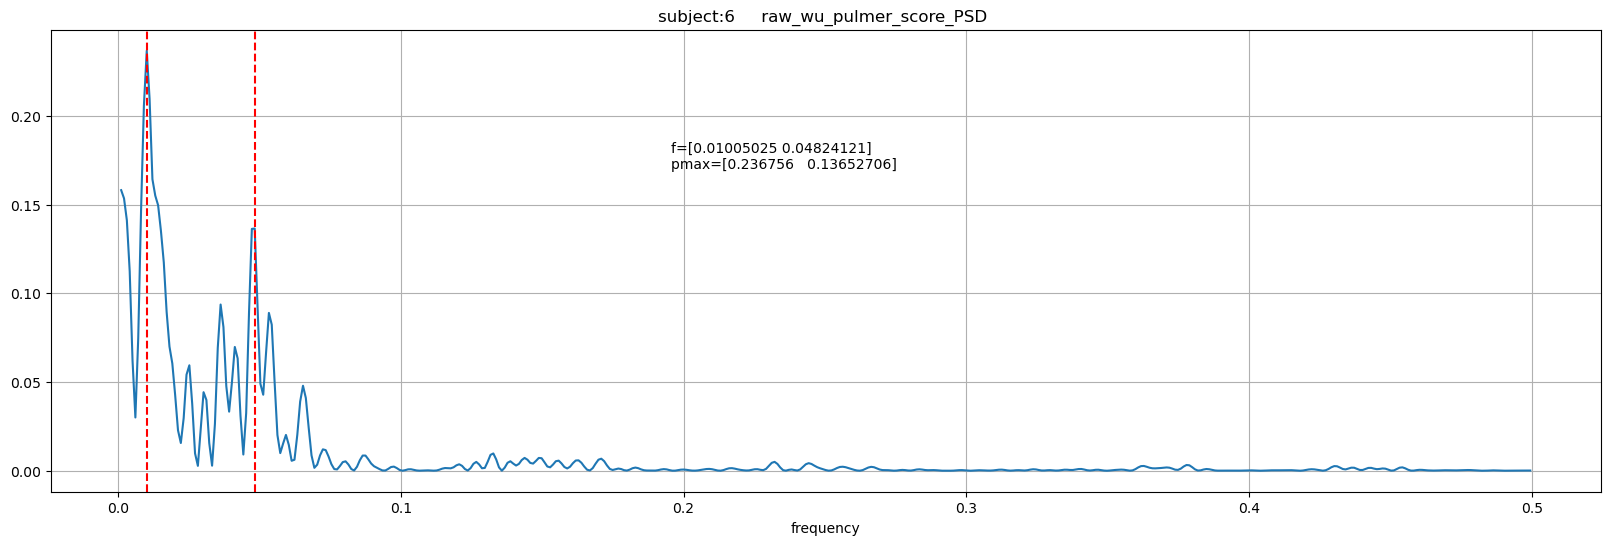

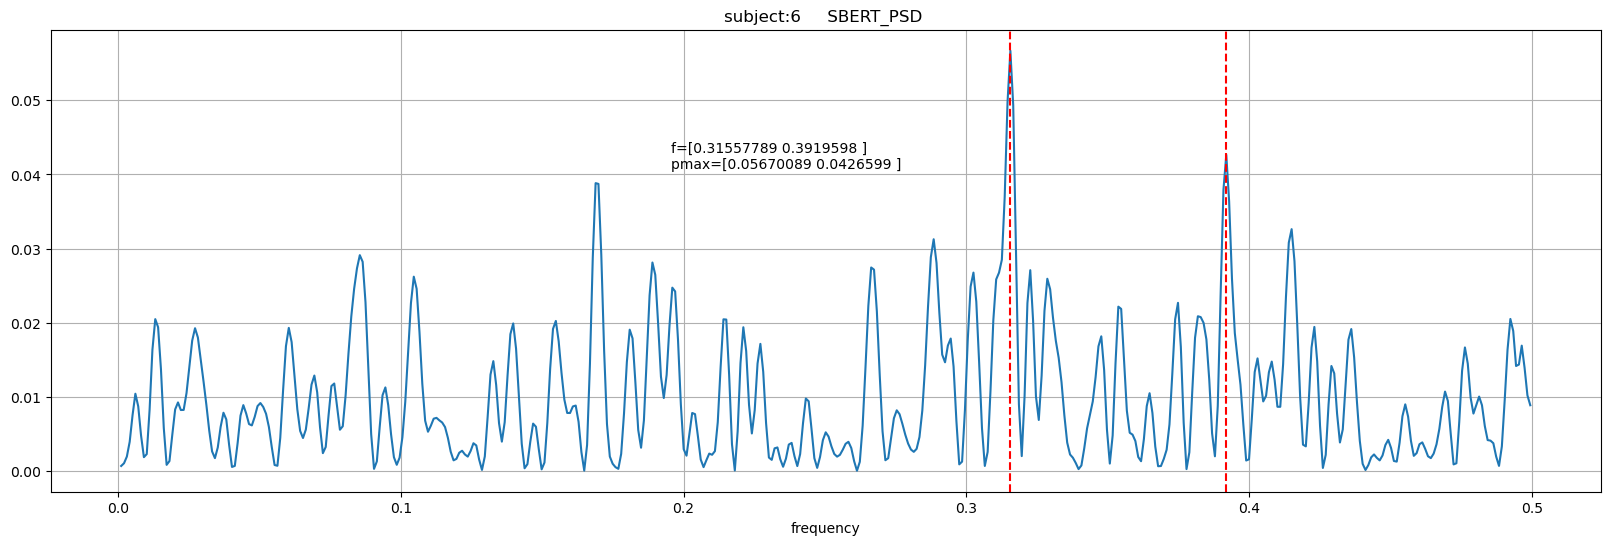

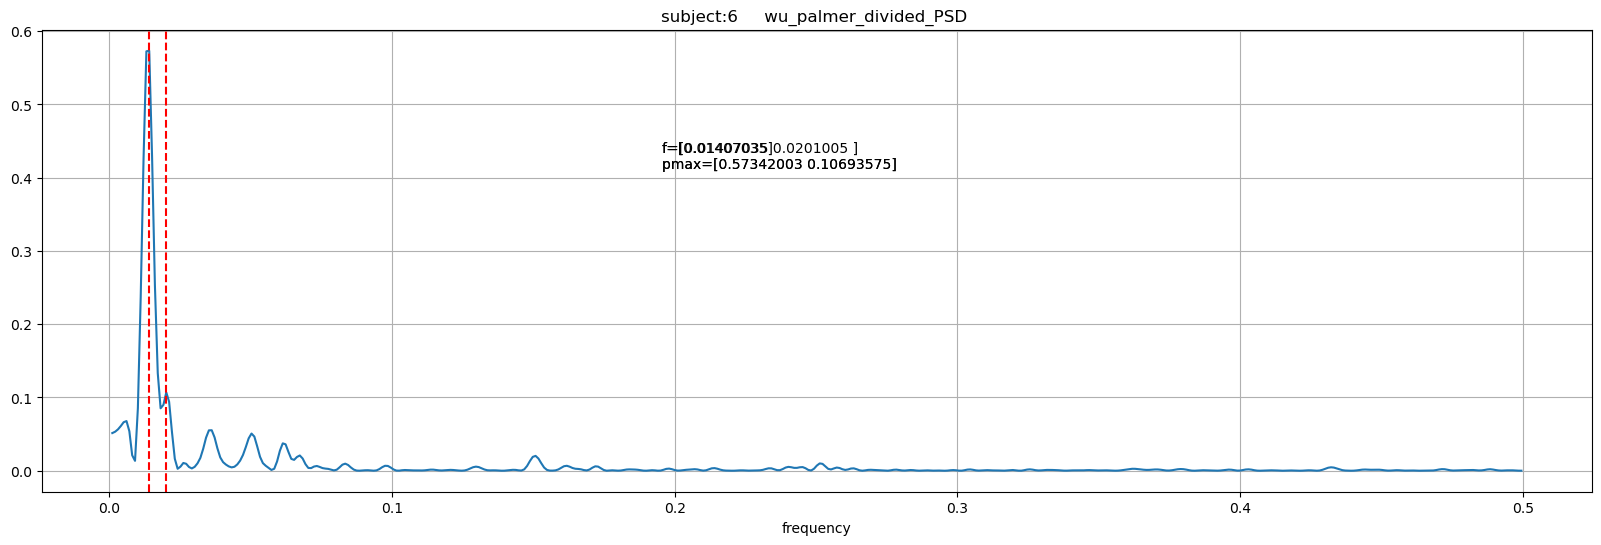

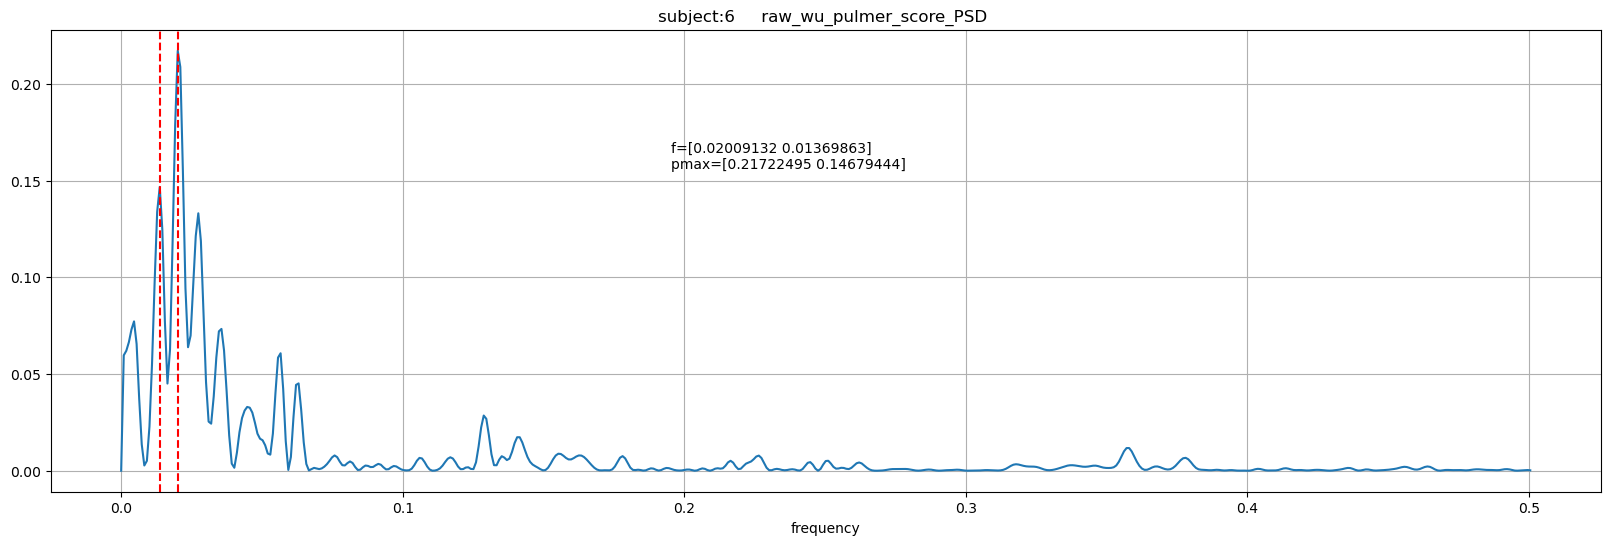

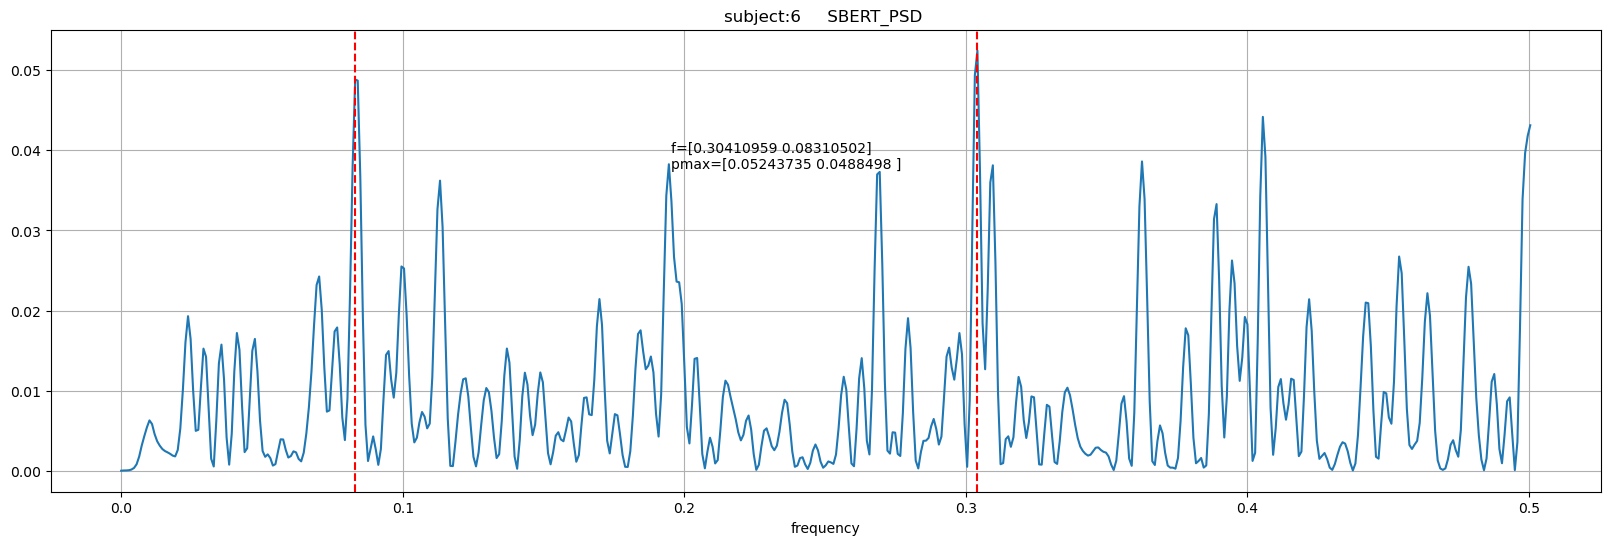

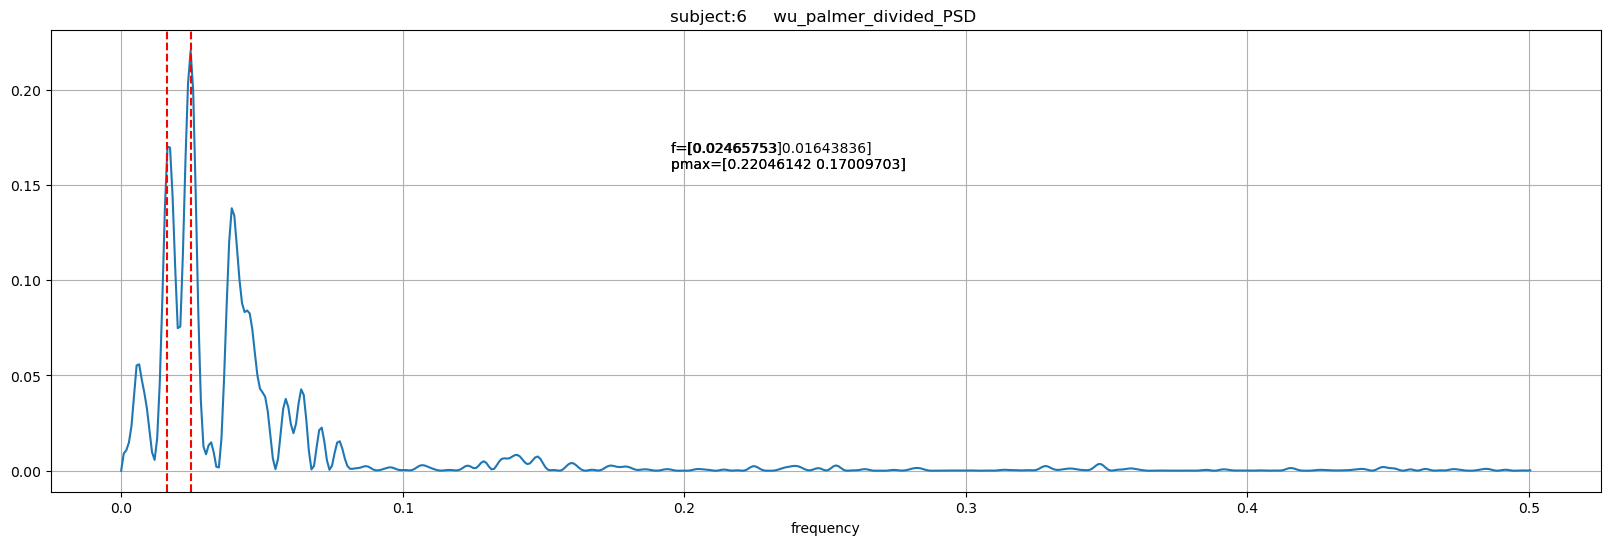

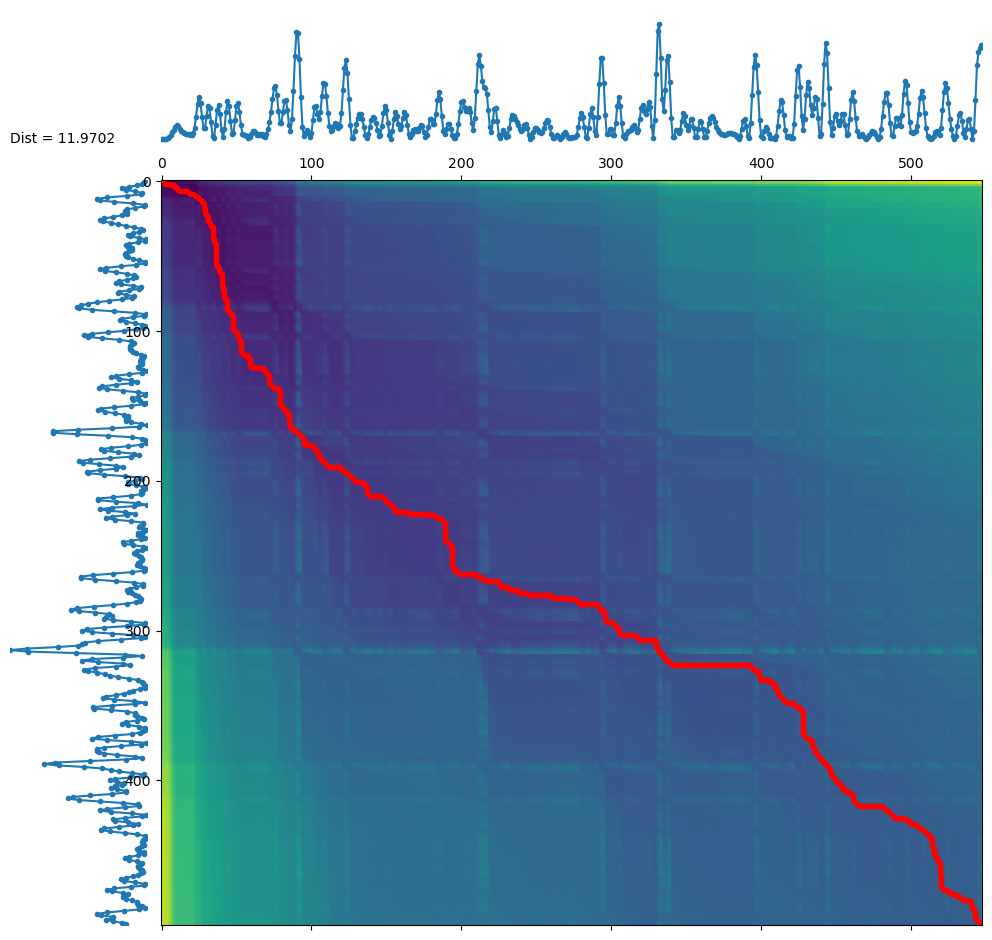

In [15]:
import statistics
from turtle import distance
from dtaidistance import dtw
from scipy.signal import windows
from dtaidistance import dtw_visualisation as dtwvis
x = 6
create_pdf(x)
read(f"data/Text/00{x}(results).csv")
calculate_PSD(6,2, 0,200)
p1 = list(SBERTp)
p1.pop(0) #不知道為什麼SBERTp的第一個值為nan，因此要pop掉後面才能用
sd1 = statistics.stdev(p1)
mean1 = statistics.mean(p1)

x = 6
read(f"data/Text/00{x}(results).csv")
calculate_PSD(6,2, 200,420)
p2 = SBERTp
p2 = list(SBERTp)
p2.pop(0)
sd2 = statistics.stdev(p2)
mean2 = statistics.mean(p2)
for i in range(len(p1)):
    p1[i] =(p1[i]-mean1)/(sd1)
for i in range(len(p2)):
    p2[i] =(p2[i]-mean2)/(sd2)

p1 = np.array(p1)
p2 = np.array(p2)
d, paths = dtw.warping_paths(p1, p2, window=800)
print(len(paths))
best_path = dtw.best_path(paths)
distances = dtw.distance(p1, p2)
print("distance=",distances)
dtwvis.plot_warpingpaths(p1, p2, paths, best_path)

#應該用SBERTp帶入dynamic time warping就好了



c:\Users\chang\anaconda3\envs\semantic\lib\site-packages\astropy\timeseries\periodograms\lombscargle\implementations\fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


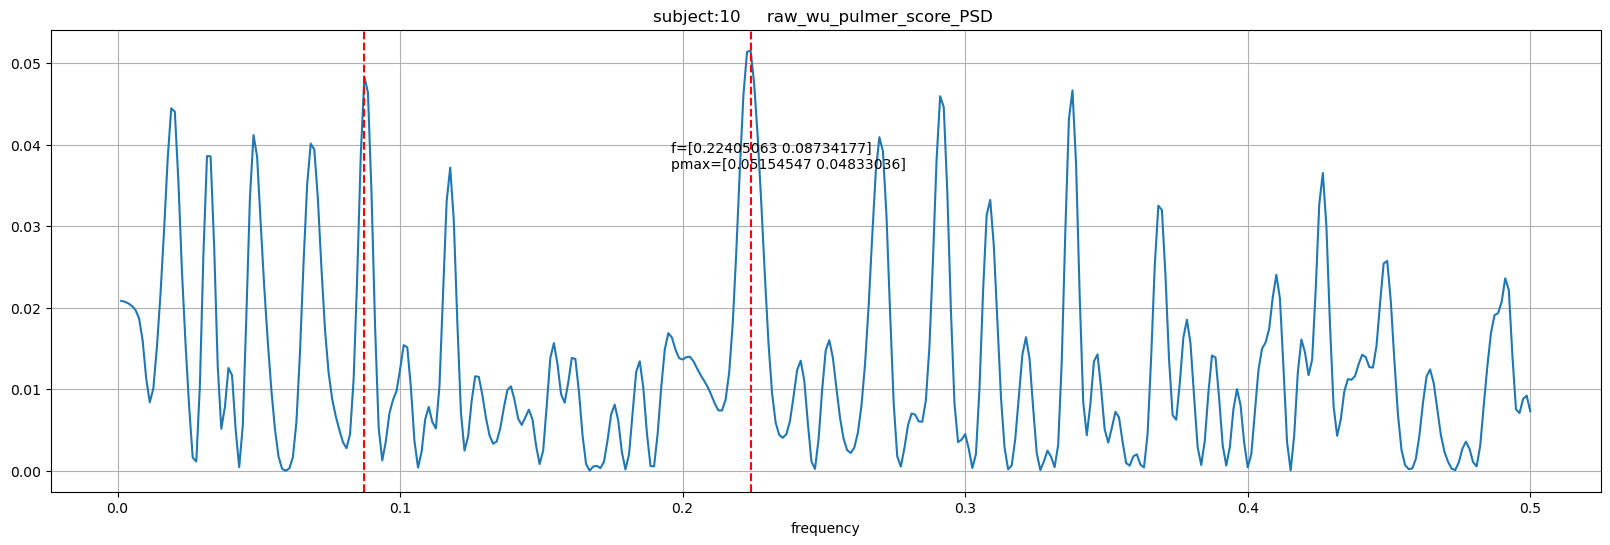

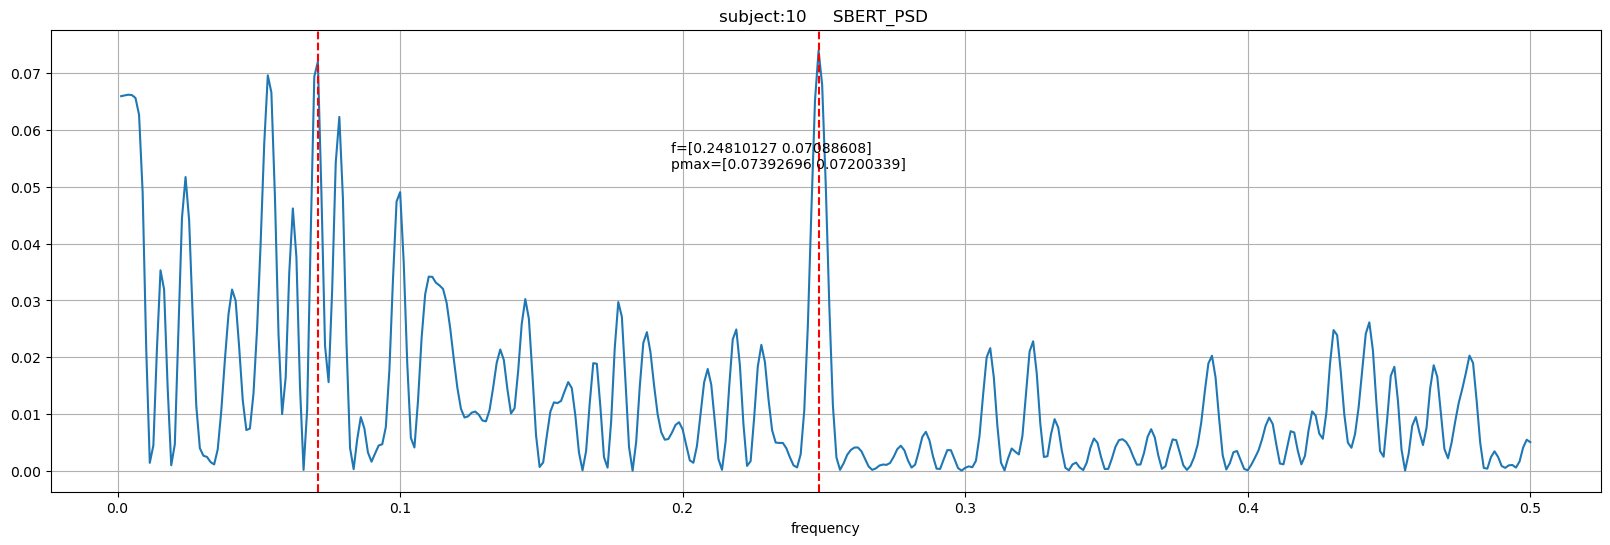

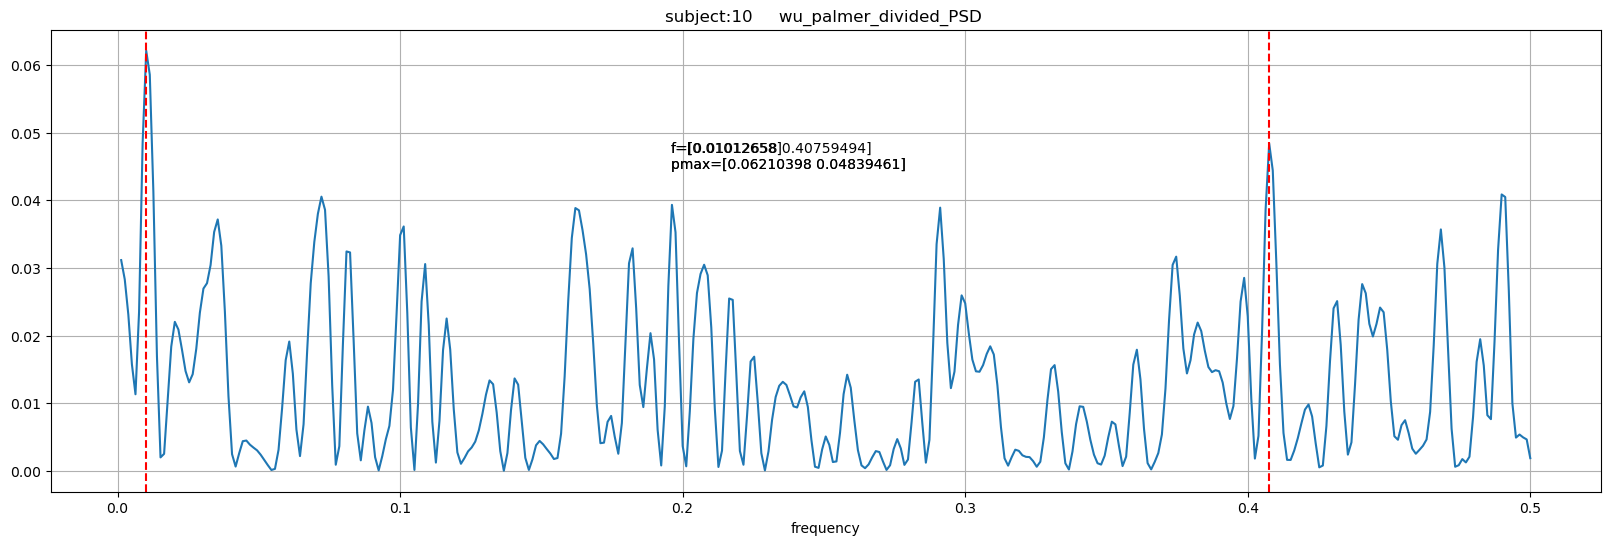

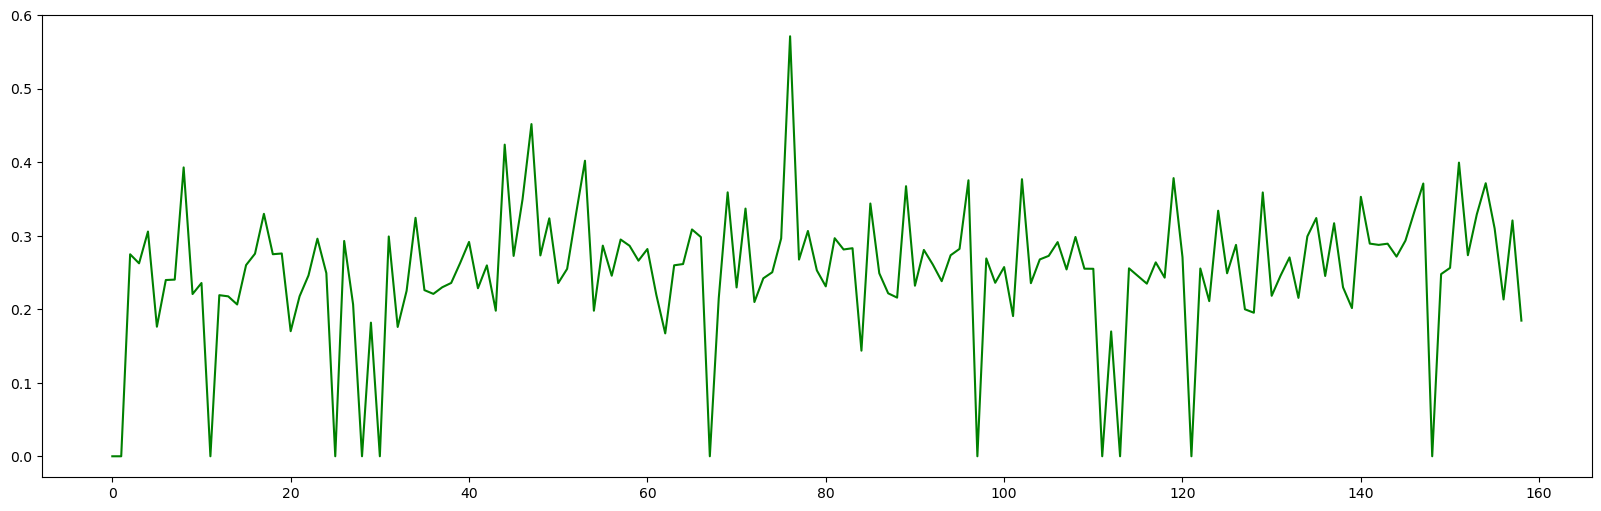

5.0 festimate= 0.0016666666666666666 freal= 0.010126582278481013 festimate+1= 0.002
phase_shift= -0.8217990774853994 phase+1= -0.9859417239676419 phase-1= -0.657556002488863
angle_portion= -0.13079338541016083
0.11920661458983917 -1.0 [98.75, 2.453416149068323]
11.771653190746617


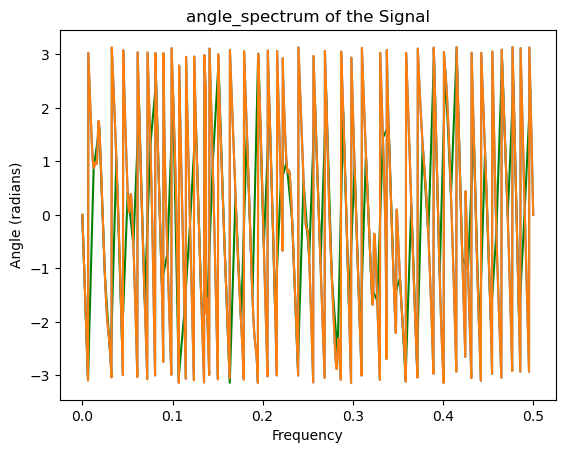

In [16]:

from cmath import phase


x = 18
create_pdf(x)
read(f"data/Text/0{x}(step0303).csv")
calculate_PSD(10, 2,starttime=0,endtime=480)
# assigning time values of the signal
# initial time period, final time period and phase angle
signalTime = num

# getting the amplitude of the signal
signalAmplitude = Wu_Pulmer_Divided

# plotting the signal 
fig = plt.figure(figsize=(20,6))
xlim = (0,400)
plt.plot(signalTime, signalAmplitude, color ='green')
plt.show()
  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Signal")



#fig = plt.figure(figsize=(20,6))
# plotting the phase spectrum of the signal 
plt.angle_spectrum(signalAmplitude, Fs=1,color ='green')
#print("len=",len(plt.angle_spectrum(signalAmplitude)[1]))
#print(plt.phase_spectrum(signalAmplitude)[2])
#print(len(plt.phase_spectrum(signalAmplitude)))
pad = 3000
position = (freq // (0.5/240)) 
if freq % (0.5/240) >= ((0.5/240)/2):
    position += 1
else:
    position = position
phase_f = plt.angle_spectrum(signalAmplitude,Fs=1,pad_to=pad)[1]
phase_phase = plt.angle_spectrum(signalAmplitude,Fs=1,pad_to=pad)[0]
print(position, "festimate=", phase_f[int(position)], "freal=",freq,"festimate+1=", phase_f[int(position)+1])
phase_shift = phase_phase[int(position)]
print("phase_shift=",phase_shift, "phase+1=",phase_phase[int(position)+1],"phase-1=",phase_phase[int(position)-1])
angle_portion = phase_shift/(2*math.pi) #plt.angle_spectrum(signalAmplitude)[0][position[0]]就是phase的radians
shift = angle_portion % 0.25
multiple = angle_portion // 0.25

print("angle_portion=",angle_portion)
print(shift, multiple,period_time)
if angle_portion <0 and multiple%2==1:
    offset_time = shift*period_time[0]
elif angle_portion <0 and multiple%2==0:
    offset_time = shift*period_time[0] + period_time[0]/4
    print(period_time[0],"x",shift,"+",period_time[0]/4,'=',offset_time)
elif angle_portion >0 and multiple%2==0:
    offset_time = period_time[0]/4 - shift*period_time[0]
    print(period_time[0]/4,"-",shift,"x",period_time[0],'=',offset_time)
elif angle_portion >0 and multiple%2==1:
    offset_time = (period_time[0]/4 - shift*period_time[0]) + period_time[0]/4

print(offset_time)

plt.title("angle_spectrum of the Signal")
plt.show()


抓極值來做wu palmer的PSD

In [17]:
'''
start_subject = int(input("start_subject = "))
end_subject = int(input("end_subject = "))
global q
for x in range (start_subject,end_subject+1):
    if x < 10:
        try:
            q = x
            read(f"data/Text/00{x}(fullpeakstep).csv")
            #create_pdf("PSD_OF_SBERT",x)
            find_extremum_and_wu_PSD(x,1)
            
            #pdfFile.close()
        except:
            print("error:", x)
            continue
       
    else:
        try:
            q = x
            read(f"data/Text/0{x}(fullpeakstep).csv")
            #create_pdf("PSD_OF_SBERT",x)
            find_extremum_and_wu_PSD(x,1)
            
            #pdfFile.close()
        except:
            print("error:", x)
            continue
print(cycle)
'''


'\nstart_subject = int(input("start_subject = "))\nend_subject = int(input("end_subject = "))\nglobal q\nfor x in range (start_subject,end_subject+1):\n    if x < 10:\n        try:\n            q = x\n            read(f"data/Text/00{x}(fullpeakstep).csv")\n            #create_pdf("PSD_OF_SBERT",x)\n            find_extremum_and_wu_PSD(x,1)\n            \n            #pdfFile.close()\n        except:\n            print("error:", x)\n            continue\n       \n    else:\n        try:\n            q = x\n            read(f"data/Text/0{x}(fullpeakstep).csv")\n            #create_pdf("PSD_OF_SBERT",x)\n            find_extremum_and_wu_PSD(x,1)\n            \n            #pdfFile.close()\n        except:\n            print("error:", x)\n            continue\nprint(cycle)\n'

抓極值來做SBERT的PSD


In [18]:

start_subject = int(input("start_subject = "))
end_subject = int(input("end_subject = "))
global q
for x in range (start_subject,end_subject+1):
    if x < 10:
        try:
            q = x
            read(f"data/Text/00{x}(results).csv")
            #create_pdf("PSD_OF_SBERT",x)
            find_extremum_and_SBERT_PSD(x,1)
            
            #pdfFile.close()
        except:
            print("error:", x)
            continue
       
    else:
        try:
            q = x
            read(f"data/Text/0{x}(peak).csv")
            #create_pdf("PSD_OF_SBERT",x)
            find_extremum_and_SBERT_PSD(x,1)
            
            #pdfFile.close()
        except:
            print("error:", x)
            continue
print(cycle)


ValueError: invalid literal for int() with base 10: ''

跑一般數據的PSD

In [ ]:

start_subject = int(input("start_subject = "))
end_subject = int(input("end_subject = "))

for x in range (start_subject,end_subject+1):
    if x < 10:
        try:
            
            read(f"data/Text/00{x}(results).csv")
            create_pdf("PSD",x)
            calculate_PSD(x,3)
            #read(f"data/Text/00{x}(peakstep).csv")
            #calculate_PSD(x,1)
            pdfFile.close()
        except:
            print("error:", x)
            continue
       
    else:
        try:
            
            read(f"data/Text/0{x}(results).csv")
            create_pdf("PSD",x)
            calculate_PSD(x,3)
           # read(f"data/Text/0{x}(peakstep).csv")
            #calculate_PSD(x,1)
            pdfFile.close()
        except:
            print("error:", x)
            continue


KeyboardInterrupt: Interrupted by user

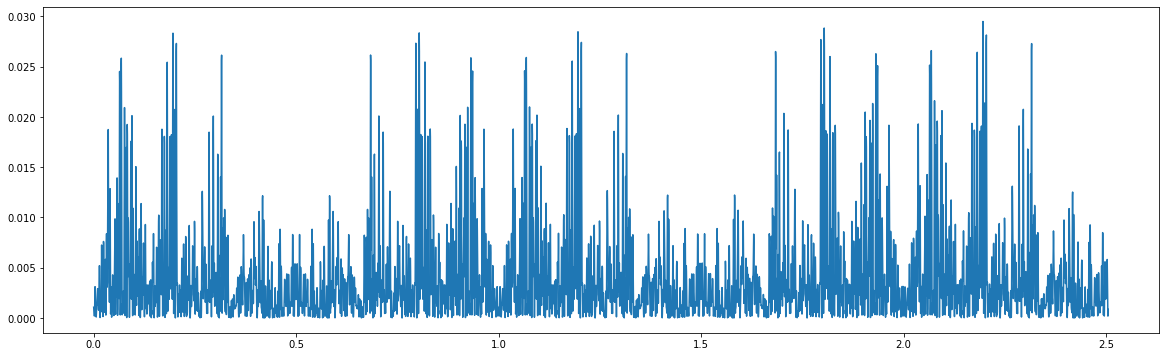

In [ ]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(num,SBERT).autopower()
fig = plt.figure(figsize = (20,6))
plt.plot(frequency, power)       

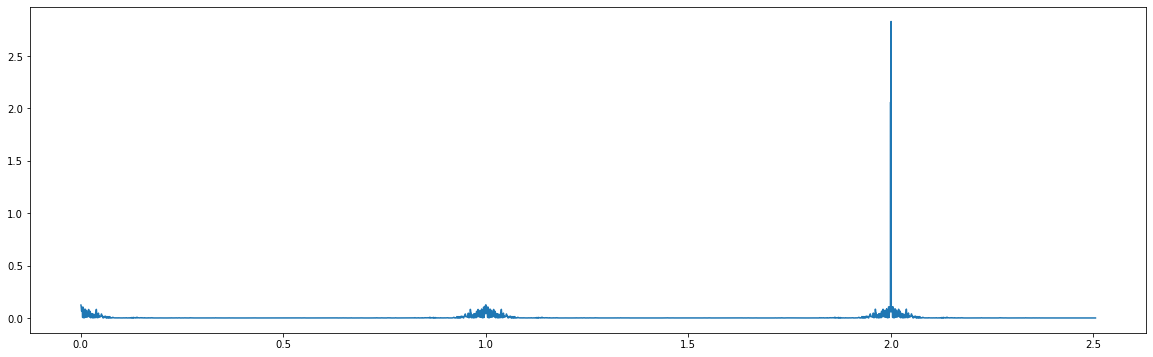

In [ ]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(num,Wu_Pulmer_Divided).autopower()
fig = plt.figure(figsize = (20,6))
plt.plot(frequency, power)       